In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generating Test Data


When we implement or test various methods for machine learning (e.g., neural networks), we need the ability to generate data with prescribed properties and also to generate "random" data or randomly select data from a given set of data. For generating random data, we need to know the probability distribution of the data.


For a random variable $V$ with the *uniform probability distribution* on an interval $\langle A,B\rangle$ it holds:

* the density function of the distribution is $\displaystyle h(x) = \begin{cases}
             \frac{1}{B-A} & \text{for } x \in \langle A,B \rangle\\
             0              & \text{otherwise}
         \end{cases}$

* a random number from the distribution can be generated using the function `random.uniform(A,B)`, which is included in the standard Python library

In [2]:
import random

A, B = 10, 20
random.uniform(A,B)

15.813563730587113

* An $m \times n$ matrix `s` represented as `numpy` array of numbers from the uniform distribution on the interval $\langle A,B \rangle$ can be generated as

In [6]:
A = 10
B = 20

m = 3
n = 4

# using just the Python standard library random
# YOUR CODE GOES HERE
s = np.random.uniform(A,B,[m,n])
s
# using numpy
# YOUR CODE GOES HERE 

array([[19.28308857, 10.68831557, 11.68062843, 16.35134294],
       [13.91187227, 14.99695157, 12.81434669, 17.40594388],
       [13.19016627, 11.74664514, 10.79933225, 18.88300708]])

For a random variable $V$ with the *normal (or Gauss) distribution* with mean $\mu$ and variance $\sigma^2$ it holds:

* the density function is the following $\displaystyle p(x) = \frac{ 1}{ \sqrt{2 \pi \sigma^2}} e^{
  -\frac{(x-\mu)^2}{2\sigma^2}}$

* For the random variable $V$ it holds that with the probability 95\% its value is from the interval
  $\langle\mu-1.96\sigma,\mu+1.96\sigma\rangle$.


The function `random.gauss(mu, sigma)` generates a random number from the normal distribution with mean `mu` and variance `sigma`. Such distribution is denoted as ${\cal N}(\texttt{mu}, \texttt{sigma})$.

In [6]:
random.gauss(5,1)

5.32036070159536

 A numpy array `s` of size $m \times n$ with numbers from the normal distribution with mean `mu` and variance `sigma` can be generated as follows:

In [9]:
mu, sigma = 2, 0.3 # mean and standard deviation

s = np.random.normal(mu, sigma, 10000)
print('s.shape:', s.shape)
print(s[:10])

s.shape: (10000,)
[1.89096415 2.14242747 1.83542035 1.73453009 2.377514   1.82835591
 1.81622295 1.52851796 1.73912767 1.99880425]


Verify the mean and the variance:

In [11]:
# is the mean eaqual to mu?
print(abs(mu - np.mean(s)))
print(abs(sigma - np.std(s, ddof=1)))


0.002048748660434363
0.0016008633258989824


In [12]:
# is the standard deviation sigma?
abs(sigma - np.std(s, ddof=1))

0.0016008633258989824

**Question:** Why in the above code `ddof=1` is used?

Display the histogram of the samples, along with the probability density function:

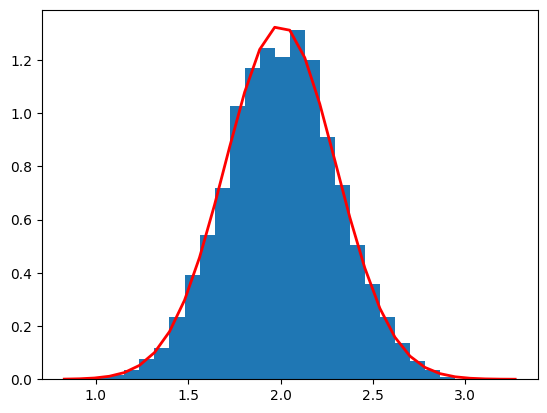

In [13]:
s = np.random.normal(mu, sigma, 10000)
bins = 30

count, bins, ignored = plt.hist(s, bins, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

**Question:** Why `density=True` is used in the above call to `plt.hist`?

Generate a two-dimensional array of samples from ${\cal N}(3, 2.5)$:

In [14]:
s = np.random.normal(3, 2.5, size=(2, 4))
print('s.shape:', s.shape)
print(s)

s.shape: (2, 4)
[[ 2.69210799  4.49881752  2.72710871  2.64446887]
 [-0.26102612  6.15791278  5.08577977  5.62128616]]


## Generating Vector with Two Clusters

Implement a function `randv2n(n1,mu1,sigma1,n2,mu2,sigma2)` that
generates one-row vector containing `n1` numbers
from the **normal distribution** with mean `mu1` and standard deviation
`sigma1` and another `n2` numbers from the normal distribution with mean `mu2` and variance `sigma2`.

E.g., `randv2n(3,-10,1,4,10,1)` can return numbers (rounded)

`[  9.95050222 -10.61370077   9.87080321  -7.90992686   9.34644975
   8.75197336 -11.08548289]`

Note that the numbers from the two clusters are **randomly mixed** in the returned vector. This can be achieved using the function `random.shuffle(x)` for an iterable `x` or `np.random.shuffle` for numpy arrays. 

In [31]:
def randv2n(n1,mu1,sigma1,n2,mu2,sigma2):
    return np.random.permutation(np.concatenate((np.random.normal(mu1, sigma1, size = n1),np.random.normal(mu2, sigma2, size = n2))))

print(randv2n(3,-10,1,4,10,1))

[ 10.91371283  10.39636891   8.5610035    9.78435817  -9.46967593
 -10.47273835  -8.52015311]


Demonstrate your implementation by constructing a histogram of the returned vector. How can we set up the number of bins in the histogram?

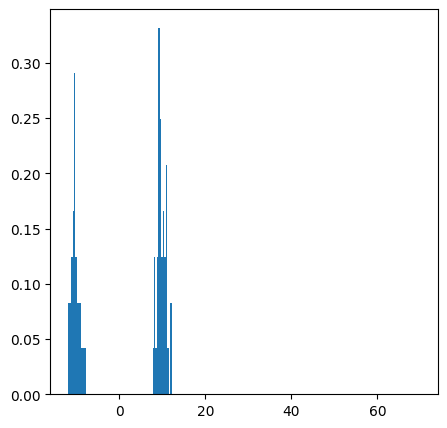

In [37]:
mu1, sigma1, mu2, sigma2 = -10, 1, 10, 1

rv = randv2n(30, mu1, sigma1, 40, mu2, sigma2)

# plot the histogram of the vector rv
# YOUR CODE GOES HERE

bins = 70
plt.figure(figsize  = (5,5))
plt.hist(rv, bins, density=True)
plt.plot(bins, 1/(sigma1 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu1)**2 / (2 * sigma1**2) ),
         linewidth=2, color='r')
plt.plot(bins, 1/(sigma2 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu2)**2 / (2 * sigma2**2) ),
         linewidth=2, color='b')
plt.show()


## Generating Clusters in 2D

Implement a function `randn2d(n, mu1, sigma1, mu2, sigma2, draw)`, with parameters `n`, `mu1`, `sigma1`, `mu2`, `sigma2` that are `numpy` vectors of the same length $n$. The function should generate a matrix of size $\displaystyle \left(\sum_{i=1}^{n} \texttt{n[i]}\right) \times 2$ containing random points in 2D. Each row of the resulting matrix is interpreted as the coordinates of a point on a plane. In the resulting matrix, For each `i`$=1,\dots,n$, `n[i]` is the number of points in the `i`-th cluster generated randomly from the normal distribution with mean `mu1[i]` and standard deviation `sigma1[i]` in the first coordinate, and with mean `mu2[i]` and standard deviation `sigma2[i]` in the second coordinate.

If the function is called with `draw != None`, the function plots a graph with graphically distinguished clusters before returning the resulting matrix (e.g., using the function `plt.scatter()`.

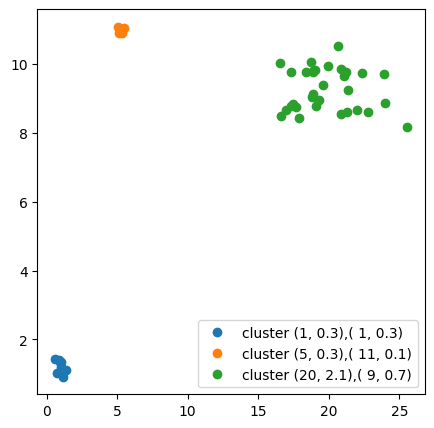

array([[18.72960583, 10.04286224],
       [ 5.4642103 , 11.03391145],
       [23.95535668,  8.86736373],
       [18.35152573,  9.77026564],
       [ 0.74606867,  1.01685914],
       [18.82754737,  9.0362837 ],
       [ 0.9796463 ,  1.33609308],
       [ 1.0364745 ,  1.19004859],
       [20.83496394,  8.54976323],
       [ 1.14624143,  0.9171707 ],
       [17.32783184,  9.74602793],
       [17.86981153,  8.42062477],
       [21.10320498,  9.64557667],
       [ 5.3555413 , 10.8927058 ],
       [19.27209029,  8.93523593],
       [18.87818085,  9.11543872],
       [ 1.17966308,  1.03885665],
       [21.98555494,  8.65494151],
       [25.54786259,  8.17158589],
       [ 1.39274168,  1.10010404],
       [16.55139843, 10.01472145],
       [21.27039845,  8.60752421],
       [ 1.22519986,  1.11766092],
       [19.06820835,  8.76873119],
       [21.31893278,  9.23370321],
       [17.69186927,  8.73011626],
       [18.99557879,  9.81170776],
       [ 0.59594545,  1.43301741],
       [18.88545711,

In [60]:
def randn2d(n, mu1, sigma1, mu2, sigma2, draw = False):
    # generate a random array with 2 columns
    # n[i] is the number of rows from cluster i
    # the first coordinate of elements from cluster i are generated from N(mu1[i],sigma1[i])
    # the second coordinate of elements from cluster i are generated from N(mu2[i],sigma2[i])
    # the retured array has shuffled rows
    # YOUR CODE GOES HERE 
    rv = []
    for i in range(len(n)):
        for j in range(n[i]):
            rv.append([np.random.normal(mu1[i], sigma1[i]), np.random.normal(mu2[i], sigma2[i])])
    
    
    if draw == "yes":
        plt.figure(figsize  = (5,5))
        for i in range(len(n)):
            sub_rv = rv[sum(n[:i]):sum(n[:i+1])]
            plt.plot([x[0] for x in sub_rv], [x[1] for x in sub_rv], 'o', label = "cluster (" + str(mu1[i]) + ", " + str(sigma1[i]) + "),( " + str(mu2[i]) + ", " + str(sigma2[i]) + ")")
        plt.legend()
        plt.show()
    return np.random.permutation(np.asarray(rv))

res = randn2d([10,4,32], [1, 5, 20], [.3, .3, 2.1], [1, 11, 9], [.3, 0.1, 0.7], draw="yes")
res

## Generating a Sample from Data

Write a function `selectk(x,k)` randomly selecting `k` rows from the input matrix `x`.

In [45]:
def selectk(x, k):
    indices = np.random.randint(0, len(x), k)
    return x[indices]

In [46]:
x = np.random.normal(3, 2.5, size=(10,3))

print(x)

[[ 0.91038366  4.23683529  0.43316923]
 [ 4.23950663  6.05649029  1.97098842]
 [ 4.07841551  4.35614586  4.31893654]
 [ 0.75488964  1.38661733  2.98235289]
 [ 2.67459289  4.88999267  3.61595208]
 [ 1.81388459  3.78291814  2.95038175]
 [ 2.30292069  5.14960775 -2.91750118]
 [ 1.92261487  1.02187031  3.31278304]
 [ 6.79769841  7.647397    4.94288633]
 [-2.30720543  5.13000313  0.93818097]]


Demonstrate your implementation on a randomly generated matrix with two columns. Plot the original and selected column vectors as points on a plane. Distinguish not selected and selected data with different colors or marks.

In [47]:
selectk(x,4)

array([[ 2.67459289,  4.88999267,  3.61595208],
       [ 6.79769841,  7.647397  ,  4.94288633],
       [ 4.23950663,  6.05649029,  1.97098842],
       [ 2.30292069,  5.14960775, -2.91750118]])

The module `scikit-learn` contains a suitable function `train_test_split`, for randomly splitting data into training and test sets. How can we ensure that the splitting is done in the same way when we repeat the splitting?

In [48]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(x)
print("train:\n", train)
print("test:\n", test)

train:
 [[ 4.23950663  6.05649029  1.97098842]
 [-2.30720543  5.13000313  0.93818097]
 [ 6.79769841  7.647397    4.94288633]
 [ 2.30292069  5.14960775 -2.91750118]
 [ 1.81388459  3.78291814  2.95038175]
 [ 2.67459289  4.88999267  3.61595208]
 [ 0.91038366  4.23683529  0.43316923]]
test:
 [[1.92261487 1.02187031 3.31278304]
 [0.75488964 1.38661733 2.98235289]
 [4.07841551 4.35614586 4.31893654]]


We can use a parameter `random_state` to ensure that the splitting is done in the same way. 

In [51]:
train, test = train_test_split(x, random_state=12345)
print("train:\n", train)
print("test:\n", test)

train:
 [[-2.30720543  5.13000313  0.93818097]
 [ 2.30292069  5.14960775 -2.91750118]
 [ 2.67459289  4.88999267  3.61595208]
 [ 4.23950663  6.05649029  1.97098842]
 [ 6.79769841  7.647397    4.94288633]
 [ 1.81388459  3.78291814  2.95038175]
 [ 4.07841551  4.35614586  4.31893654]]
test:
 [[0.91038366 4.23683529 0.43316923]
 [1.92261487 1.02187031 3.31278304]
 [0.75488964 1.38661733 2.98235289]]


In [52]:
train, test = train_test_split(x, test_size=0.5, random_state=12345)
print("train:\n", train)
print("test:\n", test)

train:
 [[2.67459289 4.88999267 3.61595208]
 [4.23950663 6.05649029 1.97098842]
 [6.79769841 7.647397   4.94288633]
 [1.81388459 3.78291814 2.95038175]
 [4.07841551 4.35614586 4.31893654]]
test:
 [[ 0.91038366  4.23683529  0.43316923]
 [ 1.92261487  1.02187031  3.31278304]
 [ 0.75488964  1.38661733  2.98235289]
 [-2.30720543  5.13000313  0.93818097]
 [ 2.30292069  5.14960775 -2.91750118]]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=19e2c2a7-f607-428f-bcc6-8ffd95c3074f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>